<a href="https://colab.research.google.com/github/SumitAwagan123/hotel-booking-analysis-/blob/main/Final_Github_sumit_and_pradulya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!
This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data.
Explore and analyze the data to discover important factors that govern the bookings.


In [1]:
# importing pandas package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick


In [2]:
# connecting to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# importing CSV file from google drive
df=pd.read_csv('/content/drive/MyDrive/Hotel booking system project /Copy of Hotel Bookings.csv')

Importing information about dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Checking the null value in data

In [5]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Removing company and agent columns

In [6]:
df.drop(['company','agent'],inplace=True,axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Adding null value to children column

In [8]:
df['children'].fillna(df['children'].median(),inplace=True)

In [9]:
df.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            0
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

Adding null value to country column

In [10]:
df.fillna({'country':0},inplace=True)

In [11]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

Que) The best time of year to book a hotel room?

Text(0.5, 1.0, 'month Wise bookings')

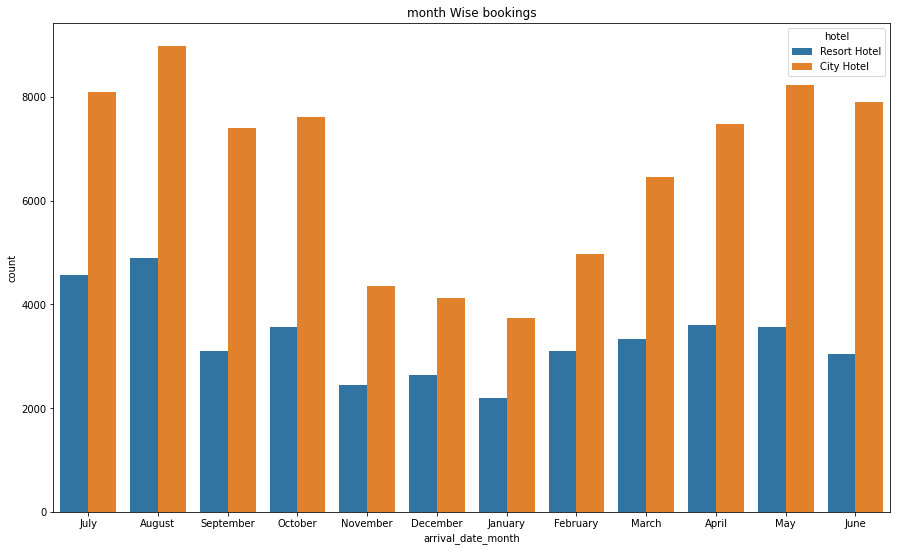

In [13]:
# set plot size
plt.figure(figsize=(15,9))

#  plot with countplot
sns.countplot(x=df['arrival_date_month'],hue=df['hotel'])
plt.title("month Wise bookings")

Observation:

As we can see most bookings were made from July to August. And the least bookings were made at the January and December of the year. The best time to visit hotel is the four month mentioned above as per customer preference and comfort.

Que) Monthly booking for three year 2015,2016,2017 ?

In [14]:
booking_year = df.groupby(['arrival_date_year', 'arrival_date_month'])['arrival_date_year'].count().unstack(1)

In [15]:
booking_year

arrival_date_month,April,August,December,February,January,July,June,March,May,November,October,September
arrival_date_year,,,,,,,,,,,,
2015,NaN,3889.0,2920.0,NaN,NaN,2776.0,NaN,NaN,NaN,2340.0,4957.0,5114.0
2016,5428.0,5063.0,3860.0,3891.0,2248.0,4572.0,5292.0,4824.0,5478.0,4454.0,6203.0,5394.0
2017,5661.0,4925.0,NaN,4177.0,3681.0,5313.0,5647.0,4970.0,6313.0,NaN,NaN,NaN


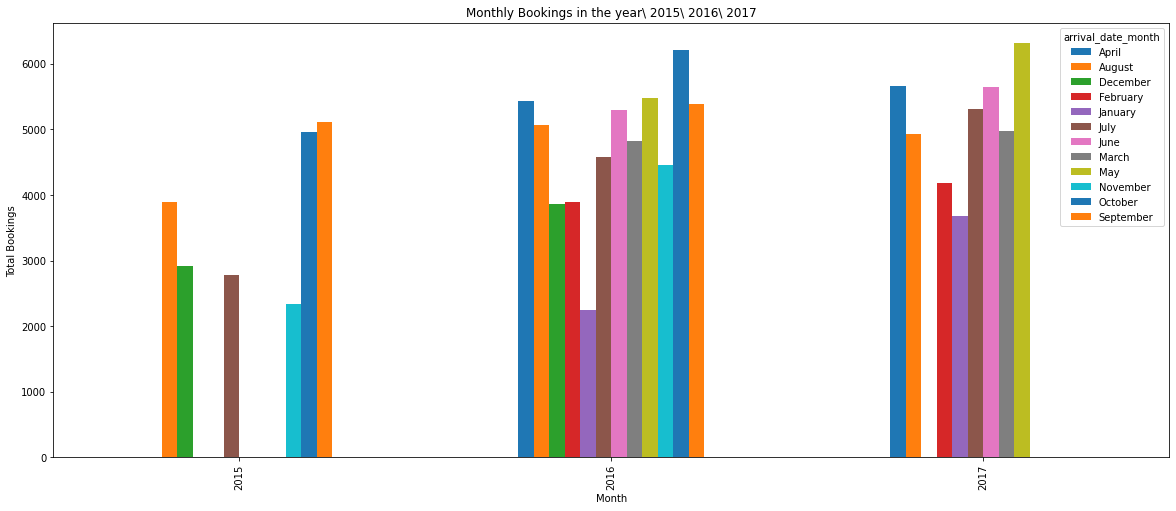

In [16]:
booking_year.plot(kind='bar',figsize=(20,8))
plt.title('Monthly Bookings in the year\ 2015\ 2016\ 2017')
plt.ylabel('Total Bookings') 
plt.xlabel('Month') 
plt.show()

Observation:

More than double bookings were made in 2016, compared to the previous year. But the bookings decreased by almost 15% the next year.

Que) The optimal length of stay in order to get the best daily rate?

In [17]:
stay = df.groupby(['lead_time', 'hotel']).agg('count').reset_index()  
stay = stay.iloc[:, :3]                                                
stay = stay.rename(columns={'is_canceled':'Number of stays'})

Text(0.5, 0, 'hotel(days)')

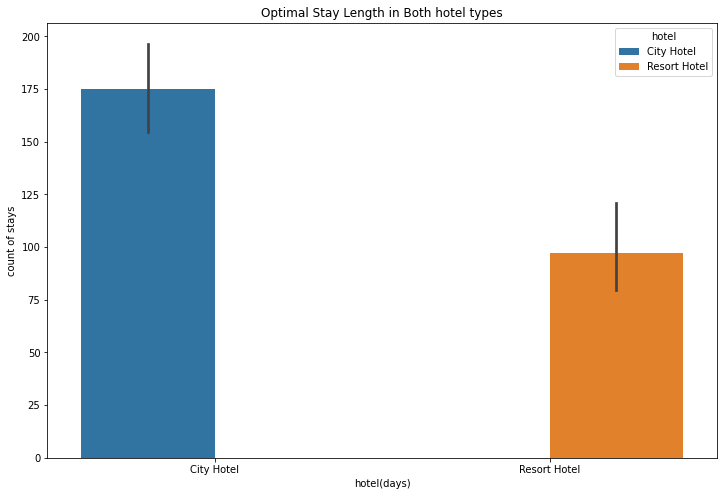

In [19]:
# set plot size and plot barchart
plt.figure(figsize=(12,8))
sns.barplot(x='hotel',y='Number of stays',hue='hotel',data=stay)
#set labels
plt.title('Optimal Stay Length in Both hotel types')
plt.ylabel('count of stays')
plt.xlabel('hotel(days)')

Observation:

More than 60% of the population booked the City hotel. As per the observation the best rate will be from City hotel.

Questions form the database

Que1) Which month has the higesr booking of the year?

In [20]:
# groupby arrival_date_month and taking the hotel count
bookings_by_months_df=df.groupby(['arrival_date_month'])['hotel'].count().reset_index().rename(columns={'hotel':"Counts"})

# Create list of months in order
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
bookings_by_months_df['arrival_date_month']=pd.Categorical(bookings_by_months_df['arrival_date_month'],categories=months,ordered=True)

# sorting by arrival_date_month
bookings_by_months_df=bookings_by_months_df.sort_values('arrival_date_month')
bookings_by_months_df

,arrival_date_month,Counts
4,January,5929
3,February,8068
7,March,9794
0,April,11089
8,May,11791
6,June,10939
5,July,12661
1,August,13877
11,September,10508
10,October,11160


Text(0, 0.5, 'Number of bookings')

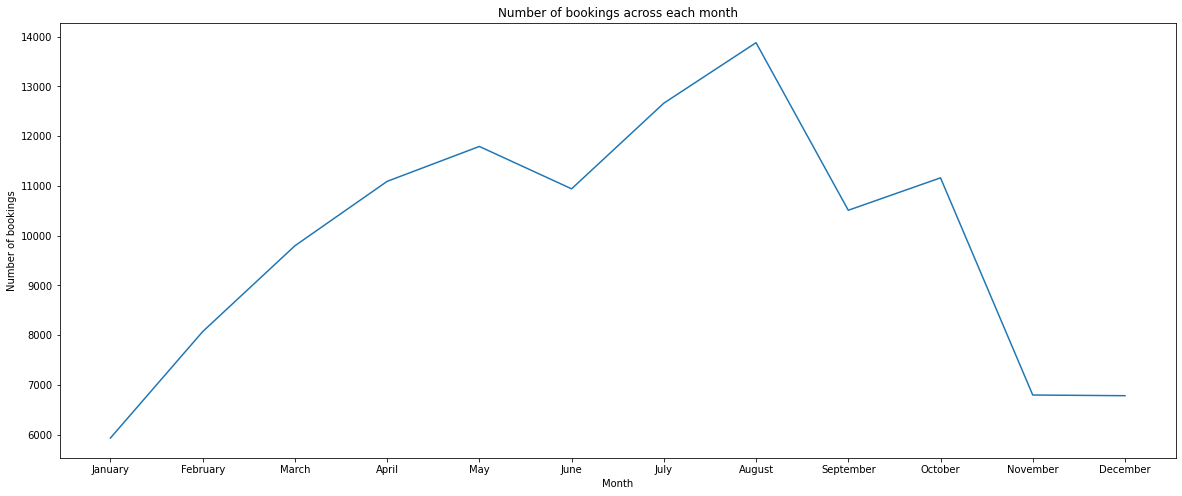

In [21]:
# set plot size
plt.figure(figsize=(20,8))

#pltting lineplot on x- months & y- booking counts
sns.lineplot(x=bookings_by_months_df['arrival_date_month'],y=bookings_by_months_df['Counts'])

# set title for the plot
plt.title('Number of bookings across each month')
plt.xlabel('Month')
plt.ylabel('Number of bookings')

Observation:

Most bookings were made from July to August.

Que2) which mode of booking customer preffer?

In [22]:
modes = df.market_segment.value_counts()


In [23]:
modes

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

<BarContainer object of 2 artists>

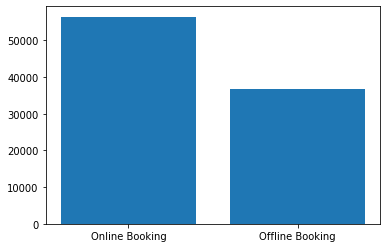

In [24]:
onlineTa = df[df.market_segment=='Online TA']
mode = ["Online Booking", "Offline Booking"]
mode_count = [modes["Online TA"],modes["Offline TA/TO"]+modes["Direct"]]
plt.bar(mode,mode_count)


Observation:

Most of the customers preffer online mode as compaired to offline mode.

Que3) How many customers are satisfied by the room alloted by hotels?

In [25]:
def fun(x,y):
    if x==y:
        return True
    else:
        return False

In [26]:
df["prefer"] = df.apply(lambda x: fun(x.reserved_room_type,x.assigned_room_type),axis=1)

In [27]:
sat_count = df["prefer"].value_counts()

<BarContainer object of 2 artists>

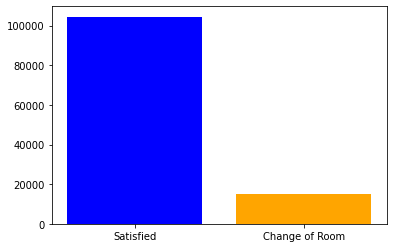

In [28]:
model = ["Satisfied","Change of Room"]
data_sat = [sat_count[True],sat_count[False]]
plt.bar(model,data_sat,color = ['blue','orange'])

Observation:

As showen in the bar graph more than 80% of the customer are satisfied by the room that has been alloted to them.

Que4) How many bookings got canceled?

Text(0.5, 1.0, 'Bookings Cancelation Status')

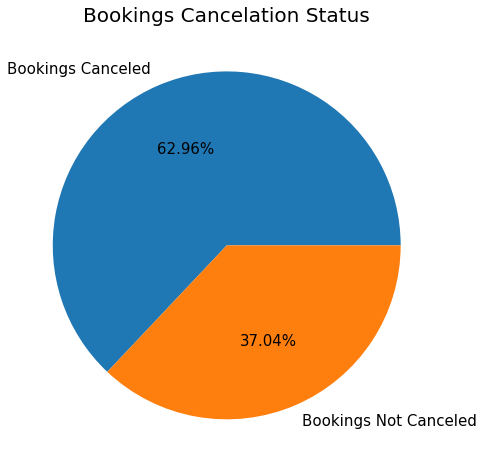

In [29]:
df.groupby('is_canceled').size().plot(kind='pie', labels=["Bookings Canceled", "Bookings Not Canceled"], fontsize=15, autopct='%.2f%%',  figsize=(8, 8))
plt.ylabel('' , fontsize=16)
plt.title('Bookings Cancelation Status', fontsize=20)


Observation:

62.96 % bookings were got cancelled out of all the bookings.

Que5) Which type of food is mostly preferred by the guests?

Text(0.5, 1.0, 'Preferred Meal Type')

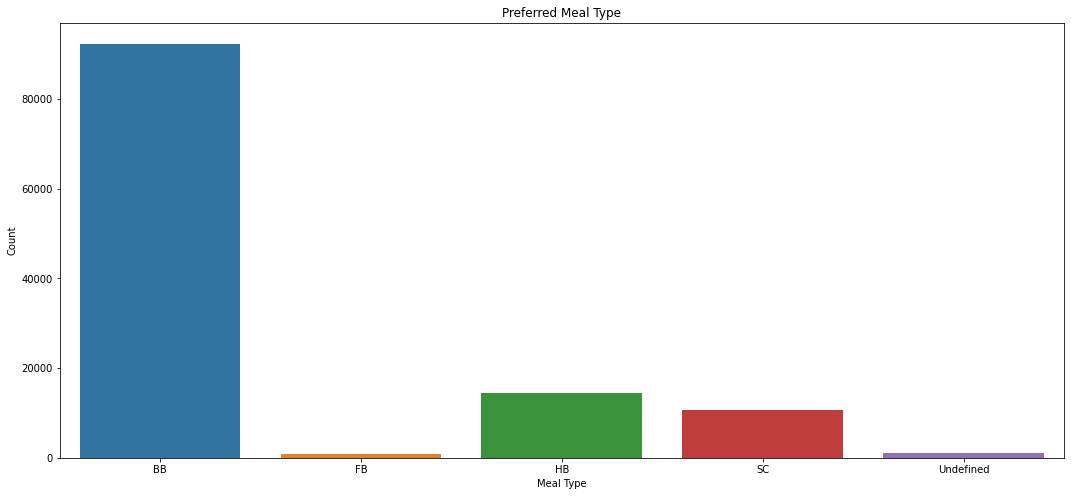

In [31]:
plt.figure(figsize=(18,8))
sns.countplot(x=df['meal'])
plt.xlabel('Meal Type')
plt.ylabel('Count')
plt.title("Preferred Meal Type")


Observation:

Types of meal in hotels:

BB - (Bed and Breakfast)

HB- (Half Board)

FB- (Full Board)

SC- (Self Catering) So the most preferred meal type by the guests is BB( Bed and Breakfast) HB- (Half Board) and SC- (Self Catering) are equally preferred.

Que6) bookings per year?

In [32]:
df.arrival_date_year.value_counts(normalize=True)

2016    0.474973
2017    0.340791
2015    0.184237
Name: arrival_date_year, dtype: float64

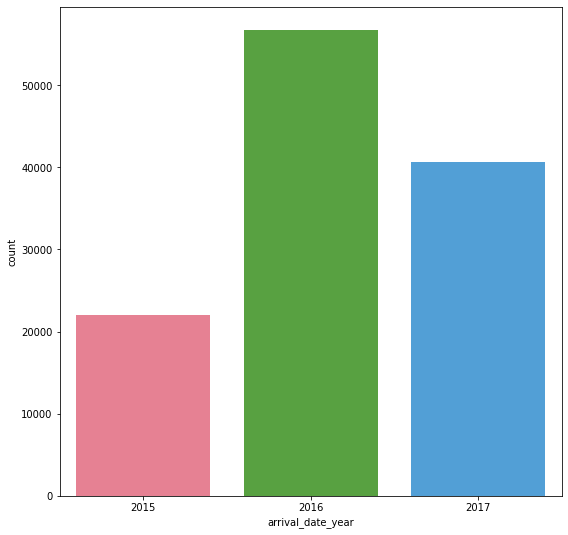

In [33]:
plt.figure(figsize=(9,9))
sns.countplot(x=df['arrival_date_year'], palette='husl')
plt.show()


observation:

 we have found that in year 2016 have highest number of booking were halt.

Conclusion:

*.Based on the exploration of Data we can say that During Summer Season the hotels are expected to get more no of bookings than any other seasons. So, if Customers want to enjoy privacy can book in remaining seasons. Majority of the Bookings happen through online as it is easy and efficient way.Conclusion: We used the dataset that contains data about hotel bookings

*.We cleaned and preprocessed the data and then we performed the exploratory data analysis to extract information from the data to answer the questions.

*.More than 60% of the population booked the City hotel. More than double bookings were made in 2016, compared to the previous year. But the bookings decreased by almost 15% next year.Most bookings were made from July to August. And the least bookings were made at the start and end of the year. Portugal, the UK, and France, Spain and Germany are the top countries from most guests come, more than 80% come from these 5 countries. Most people stay for one, two, or three.For Resort hotel, the most popular stay duration is three, two, one, and four days respectively. For City hotel, most popular stay duration is one,two,seven(week), and three respectively Couple (or 2 adults) is the most popular accommodation type.

*.City hotels are the most preferred hotel type by the guests. We can say City hotel is the busiest hotel. 27.5 % bookings were got cancelled out of all the bookings. Maximum number of guests were from Portugal, i.e. more than 25000 guests. So the most preferred meal type by the guests is BB( Bed and Breakfast) And HB- (Half Board) and SC- (Self Catering) are equally preferred.Most of the bookings for City hotels and Resort hotel were happened in 2016.

*.Github link Sumit Awagan-https://github.com/SumitAwagan123/hotel-booking-analysis-

*.Github link Pradulya- https://github.com/Pradulya/hotel-booking-analysis6/blob/main/Pradulya_Hotel_Booking_Analysis_Capstone_Project.ipynb

*.final Github- https://github.com/SumitAwagan123/hotel-booking-analysis-/blob/main/Final_Github_sumit_and_pradulya.ipynb